<img src="https://communications.univie.ac.at/fileadmin/_processed_/csm_Uni_Logo_2016_2f47aacf37.jpg" 
     alt="Logo Universität Wien" 
     width="200"/>

# Practical Machine Learning for Natural Language Processing - 2023 SS  

### Assigment 2 - Generators and Classes   

In this assigment we are going to play with generators and instances/classes - structures that retain state.  

***

### 1. Alea Iacta Est  

(a) Using [generator functions](https://github.com/rsouza/Python_Course/blob/master/Notebooks/Python_Basic/03_Functions.ipynb), create an object that emulates an eight-sided dice (1-8) that is biased, such that the probability of this generator function returning a certain value is proportional to the value itself (i.e. the face "6" is 3 times more likely to come out than face "2");  

 <img src="https://cdn11.bigcommerce.com/s-70184/images/stencil/608x608/products/532/7428/d8-dice-blue__64321.1664335674.jpg" alt="8-Dice" style="width:250px;height:300px;"> 

(b) Using [Matplotlib](https://matplotlib.org/) plt.plot or plt.hist commands, show graphically the result of 10000 casts of the die;  

(c) Modify this generator function so that it terminates automatically when all possible values (1,2,3,4,5,6,7,8) have been cast at least once. In this case, it will return the total absolute time that has elapsed since the first iteration.  (hint: a function can have both **return** and **yield** commands)  

In [1]:
# a)
import random

def dice():
    sides = [1, 2, 3, 4, 5, 6, 7, 8]
    probabilities = [1, 2, 3, 4, 5, 6, 7, 8]
    while True: #an infinite loop. We don`t know how many rolls it would take to achieve the desired condition
        throw = random.choices(sides, probabilities)[0]
        yield throw
        
dice_throw = dice()
for i in range(10): # we throw the dice 10 times
    print(next(dice_throw)) # we throw the dice again and again, until the loop iterates 10 time     
      

8
6
5
8
4
6
8
7
6
3


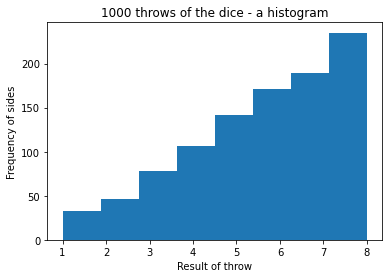

In [18]:
# b)
import random
import matplotlib.pyplot as plt

def dice():
    sides = [1, 2, 3, 4, 5, 6, 7, 8]
    probabilities = [1, 2, 3, 4, 5, 6, 7, 8]
    while True: #an infinite loop
        throw = random.choices(sides, probabilities)[0]
        yield throw
        
dice_throw = dice()
throws_list = [] #we create a list to keep all the dice throws together,in order to visualize the distribution of dice throws
# The thwrows can be only visualized when they are gathered together

for i in range(1000): # we throw the dice 10 times
    result_of_throw = next(dice_throw)
    #print(result_of_throw) # we throw the dice again and again, until the loop iterates 10 times
    throws_list.append(result_of_throw)

plt.hist(throws_list,bins=8) #we divide the histogram into 8 equal bins
plt.title('1000 throws of the dice - a histogram')
plt.xlabel('Result of throw') #represents possible outcomes of the dice throw
plt.ylabel('Frequency of sides')# we see how many times each side of the dice is shown
plt.show()


In [16]:
# c)
import random
import time

def dice():
    sides = [1, 2, 3, 4, 5, 6, 7, 8]
    thrown_values = set()#we create this set outside of the loop, so it is empty at the start of each iteraton 
    starttime = time.time() # time.time() shows the curent time before rolling the dice. We only want to capture the start time it takes to roll the dice at least once for each side, that is why we put this line outside of the loop
    while True: #an infinite loop that will go on rolling the dice until wanted condition is true
        throw = random.choice(sides)
        thrown_values.add(throw)#each time the dice is thrown, the set is updated (a new twrow is added to the set)
        yield throw # we want to get a result of every throw as it occurs. "yield throw" gives us every throw value as it is generated 
        if len(thrown_values) == len(sides):
            endtime = time.time()# time.time() shows the curent time sftering the dice
            return endtime - starttime

        
        
dice_throw = dice()
for i in range(10):
    print(next(dice_throw))

endtime = time.time()
starttime =time.time()
print(endtime-starttime) #here I always get an error and I do not get the time printed...

        


7
8
3
5
2
8
6
4
1


StopIteration: 0.0

### 2. A ticket to the first Class    

+ Create a Class called "Elevator". Each instance of this class receives as parameters the number of floors in the building and starts the elevator on the lowest floor.  
+ This Class should have methods and properties to allow the elevator to:
<br></br>
    + Receive a call - user(s) press a button to go to specific floor(s);  
    + Receive a floor as a destination - when users enter the elevator, each one may press a button to choose destination floor;  
    + Store and inform which floor the elevator is at each moment(consider that trips for consecutive floors takes 5 seconds, and stopping takes 10 seconds);  
    + Store and inform which users are in the elevator;  
    + Store and inform the sequence of floors yet to be visited;  
    + Store the number of times the elevator stopped in each floor (passing through the floor without "stopping" on the floor does not count);  
    + Refuses commands to go to inexistent floors.  
<br></br>
+ Simulate the behavior of the elevator serving ten users, each one calling from a random floor, and chosing a random destination floor.   
+ Graphically illustrate the current elevator position for the requested simulation.   
+ (BONUS) Create a smart building simulator, controlling calls made to n > 1 elevators and routing elevator properly.  

Your destination is the 5 floor
You are now on the 1 floor
You arrived at the 5floor


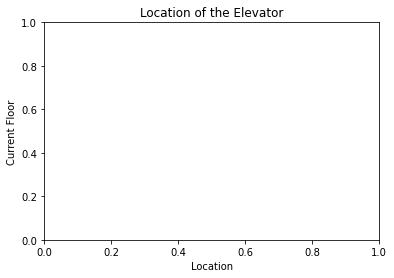

In [17]:
import time
import random
import matplotlib.pyplot as plt

class Elevator:
    
    def __init__(self, number_of_floors):        
        self.number_of_floors = number_of_floors
        self.floors = [] # possibe floors where we can go with the elevator and which we can call
        self.current_floor = 1
        self.stops = {} # dictionary for storing the number of times the elevator stopped at each floor

        


    def recieve_call(self, call):
        if call not in self.floors:
            self.floors.append(call)
            print(f"You chose to go to the {call} floor") 
        return f"You chose to go to the {call} floor" # but here I am not sure if I should move the return statement to the left or store it exactly undr the print statement...

            
    def select_destination(self, destination):
        if destination not in self.floors:
            self.floors.append(destination)
            print(f"Your destination is the {destination} floor")
        return "Your destination is the {destination} floor"
   
       
    def inform_location(self,location):
        start_time = time.time()
        trip_next_floor = 5 # 5 seconds
        stopping = 10 # 10 seconds
        for floor in self.floors:
            if floor > self.current_floor:                
                time_to_next_floor = trip_next_floor * (floor - self.current_floor)
            else:                
                time_to_next_floor = trip_next_floor * (self.current_floor - floor)
                
            time.sleep(stopping)
            print(f"You are now on the {self.current_floor} floor")
            time.sleep(stopping)
            
            self.current_floor = floor #we need to update the curent floor
            
        print(f"You arrived at the {self.current_floor}floor")
        return f"You arrived at the {self.current_floor}floor"

        
    def check_users(self,*users):# the * operator allow us to have any number of arguments, so we can have 1 or more users in the eleavator at once
        self.users = []
        for user in users:
            if user not in self.users:
                 self.users.append(user)                         
                 print(f"These users are in the elevator: {user}")
            return f"These users are in the elevator: {user}"    
                
    def floors_to_be_visited(self, *floors):
        self.current_floor = 0
        desired_floors = []
        for floor in floors:
            desired_floor = self.current_floor + floor
            desired_floors.append(desired_floor)
        print(f"The number of the floors yet to be visited is {desired_floors}")
        for floor in desired_floors:
            floors_to_pass = self.current_floor - floor
            print(f"You need to pass {floors_to_pass} floors to reach the {floor} floor.")
            self.current_floor = floor
        remaining_floors = []
        for floor in range(self.current_floor, self.number_of_floors + 1):
            remaining_floors.append(floor)
        print(f"The remaining floors to be visited are {remaining_floors}.") 
        return f"The remaining floors to be visited are {remaining_floors}."
    
    def count_stops(self):
        stops_info = ""
        for floor, stops_on_floor in self.stops.items():
            stops_on_floor += 1 # we add 1 to the number of stops on each floor
            self.stops[floor] = stops_on_floor # we update the value associated with the floor key in the stops dictionary to the new stops_on_floor value
            #At the same time keys in the dictionary remain unchanged 
            stops_info += f"The elevator stopped {self.stops[floor]} time on floor the {floor}"
            print(f"The elevator stopped {self.stops[floor]} time on the floor {floor}")
        return stops_info # but here I always get an empty line as a result
    
    def refuse_commands(self,floor):
        if floor > len(self.floors):
            print ("There is no such floor in the building.")          


    
    def elevator_behaviour(self):
        users = [] #users is a list of tuples, where each tuple represents a user with a starting floor and a destination floor
        #So "users" may look like this [(3,4), (5,9)] and it would mean that the first user starts at floor 3 and wants to go to floor 4, and the second user starts at floor 5 and wants to go to floor 9
        for i in range(1, 11):
            start_floor = random.randint(1, self.number_of_floors) #we get a random integer between 1 and "self.number_of_floors" (number of floors in the building)
            destination_floor = random.randint(1, self.number_of_floors)
            users.append((start_floor, destination_floor))
        
        for start_floor, destination_floor in users: #we want to unpack the list "users"
            #for each tuple in the users list, we want to extract the first element and assign it to start_floor. And we want to assign the second element to destination_floor
            self.recieve_call(start_floor)# this is the first step in simulating the behavior of the elevator
            self.select_destination(destination_floor)
            self.inform_location(self.current_floor)
            self.count_stops()
            #we can use a different argument for the already existing methods within our Class
        
        return
        
    def graphical_illustration(self):
        x = ['Floor'] # x is a list which contains only one element - the string 'Floor'
        y = [self.current_floor]
        plt.xlabel('Location')
        plt.ylabel('Current Floor')
        plt.title('Location of the Elevator')
    
        plt.show()            

            

                
            
           
#e = Elevator(6) # we create a new instance of the Elevator class with 6 floors
#print(e.number_of_floors) #printing the number of floors of the elevator
#e.recieve_call('3') # we make a call to the elevator to go to the 3rd floor

#e1 = Elevator(10)
#e1.select_destination("5")

#e2 = Elevator(15) #checking inform_location method
#e2.recieve_call(5)
#e2.select_destination(10)
#e2.inform_location(5)


#e3 = Elevator(12)
#e3.check_users("Mary", "John")

#e4 = Elevator(8)
#e4.floors_to_be_visited(3)       


#e5 = Elevator(10)
#e5.inform_location(8) 
#e5.count_stops()

#e6 = Elevator(10)
#e6.refuse_commands(12)

#e7 = Elevator(10)
#result = e7.elevator_behaviour()
#print(result)


e8 = Elevator(10)
e8.select_destination(5)
e8.inform_location(3)
e8.graphical_illustration()




                  

        


            